In [62]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.linalg as linalg
import scipy.stats as stats

## Chargement des données, suppression des variables qualitatives

In [63]:
data = pd.read_csv('../dataset/data_cleaned.csv')
df = data.drop(columns="Diagnosis")

## Suppression de l'effet de grandeur et Centrage des données

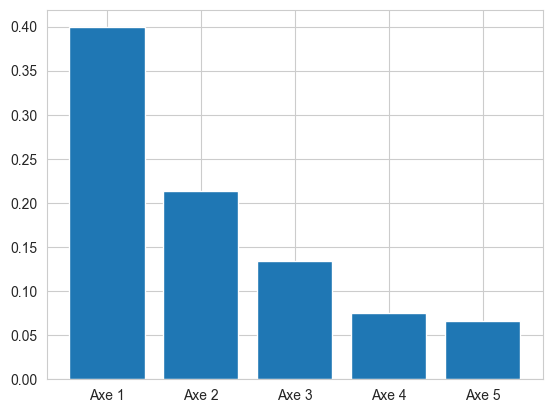

In [64]:
taille = df.sum()
df_quantitatifs = df/taille 
mean = df_quantitatifs.mean(axis=0)
df_quantitatifs = df_quantitatifs-mean

cls = PCA(n_components=5)
pcs = cls.fit_transform(df_quantitatifs)
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], cls.explained_variance_ratio_)
plt.show()

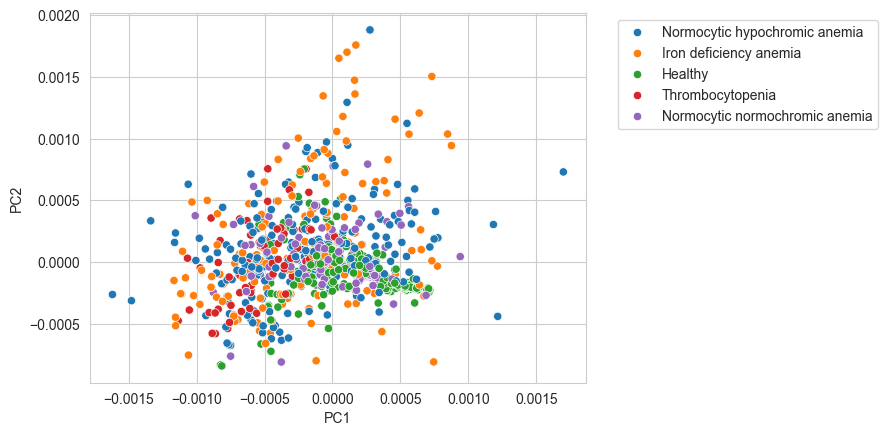

In [65]:
df_Class = pd.DataFrame(pcs, columns=[f"PC{i}" for i in range(1, 6)])
sns.scatterplot(x="PC1", y="PC2", hue=data.Diagnosis, data=df_Class)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

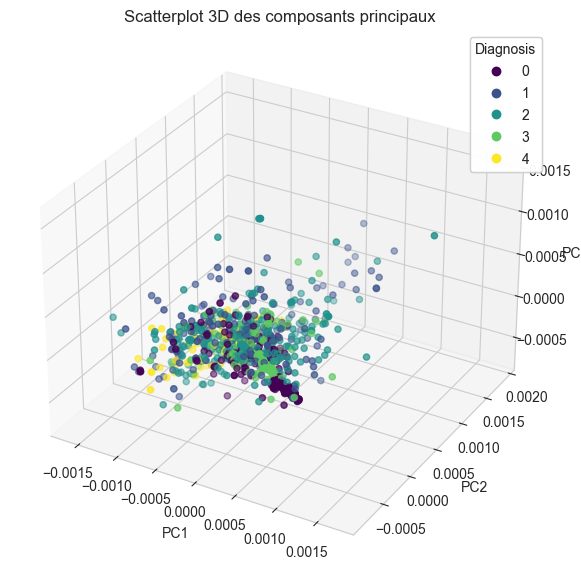

In [66]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_Class['PC1'], df_Class['PC2'], df_Class['PC3'], c=pd.Categorical(data['Diagnosis']).codes, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Scatterplot 3D des composants principaux')
legend1 = ax.legend(*scatter.legend_elements(), title="Diagnosis")
ax.add_artist(legend1)
plt.show()

## Standard scaler

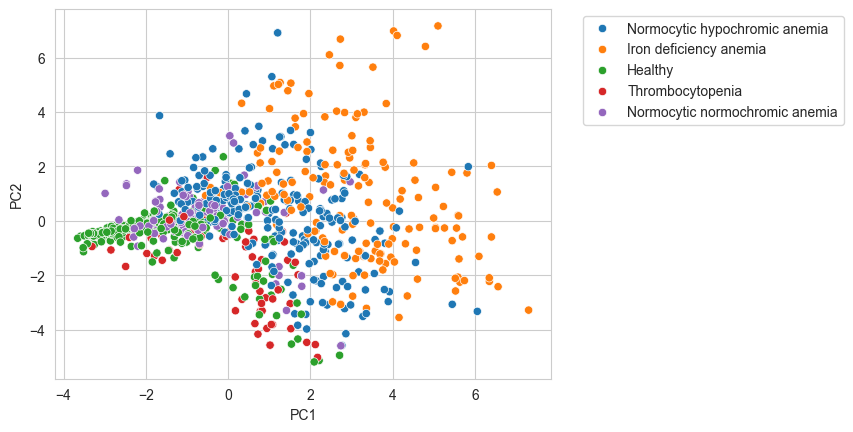

In [67]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
pca = PCA(n_components=5)
pcs = pca.fit_transform(X)
pca_df = pd.DataFrame(pcs,columns=[f"PC{i}" for i in range(1, 6)])
sns.scatterplot(x="PC1", y="PC2", hue=data.Diagnosis, data=pca_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

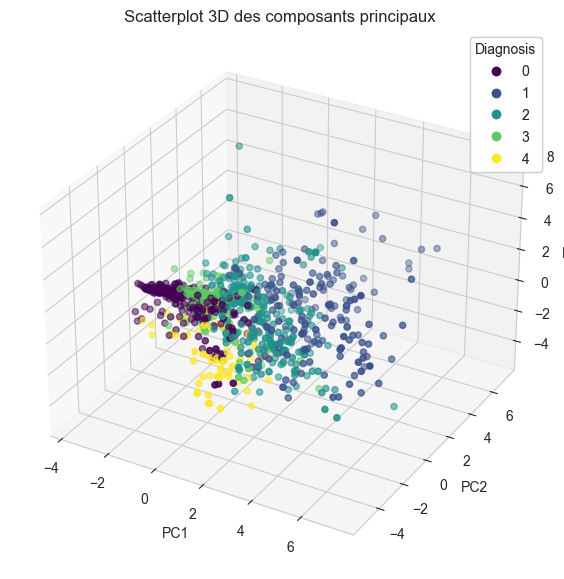

In [68]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pd.Categorical(data['Diagnosis']).codes, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Scatterplot 3D des composants principaux')
legend1 = ax.legend(*scatter.legend_elements(), title="Diagnosis")
ax.add_artist(legend1)
plt.show()

## Min Max Scaler

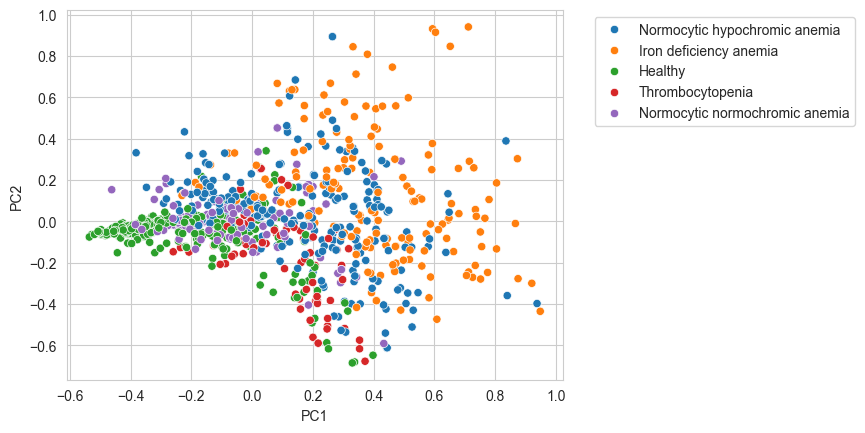

In [69]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_quantitatifs), columns = df_quantitatifs.columns)
X = X - X.mean()
pca = PCA(n_components=5)
pcs = pca.fit_transform(X)
pca_df = pd.DataFrame(pcs,columns=[f"PC{i}" for i in range(1, 6)])
sns.scatterplot(x="PC1", y="PC2", hue=data.Diagnosis, data=pca_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

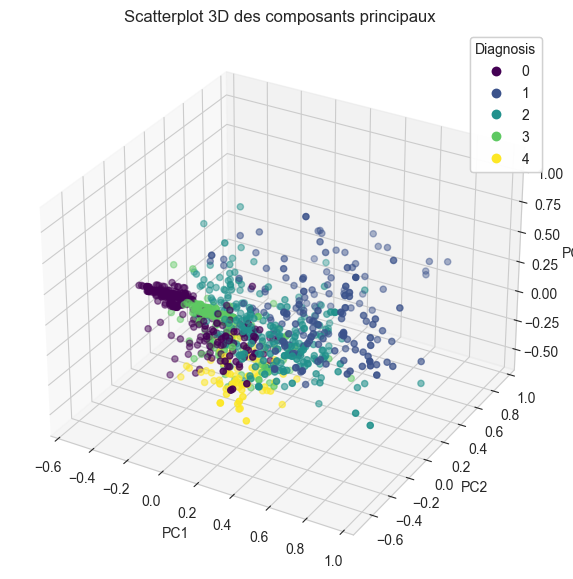

In [70]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pd.Categorical(data['Diagnosis']).codes, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Scatterplot 3D des composants principaux')
legend1 = ax.legend(*scatter.legend_elements(), title="Diagnosis")
ax.add_artist(legend1)
plt.show()

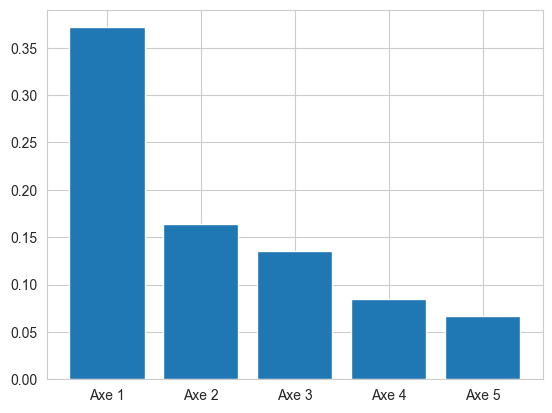

In [71]:
plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], pca.explained_variance_ratio_)
plt.show()